In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Movies on 50's and 60's made more revenue than movies nowadays (00's and 10's)

- **H0** = No difference between revenue of movies between 50's/60's and movies nowadays (00's/10's 
- **H1** = There is a difference 

In [2]:
data_with_inflation = pd.read_csv('data_adjusted_to_inflation.csv')
data_for_ht = data_with_inflation.replace(0,data_with_inflation.median())

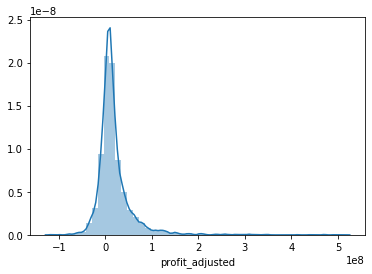

In [3]:
sns.distplot(data_for_ht.profit_adjusted)

In [4]:
fifth_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['profit_adjusted'])
now_movies_profit_adjusted = np.array(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['profit_adjusted'])

In [5]:
# romance_movies_profit_adjusted

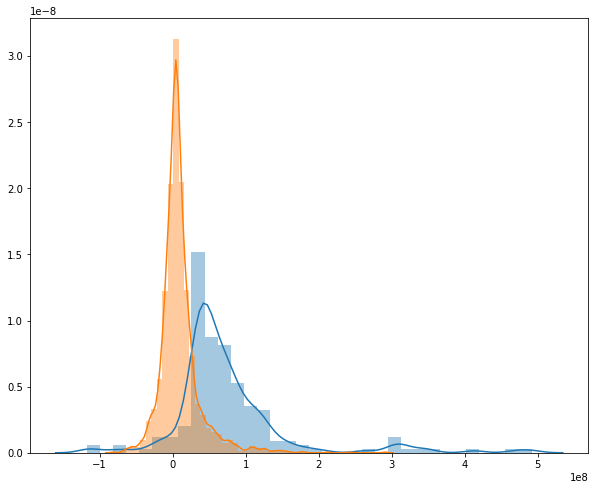

In [6]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_profit_adjusted)
sns.distplot(now_movies_profit_adjusted)


### Sampling samples

In [7]:
import random 

In [8]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 40)))
    return sample_means

In [9]:
fiv_sample_means = samples_means(fifth_movies_profit_adjusted, 100)
now_sample_means = samples_means(now_movies_profit_adjusted, 100)

print(fiv_sample_means, now_sample_means)

[86964585.47642337, 100600573.81127027, 71838523.28353624, 86169882.23810682, 81328149.8179172, 69887225.94418848, 63288181.97622359, 67710840.9816095, 93737261.01287992, 100419571.22998825, 49372415.584179, 61500420.66722697, 79120712.56617518, 79863718.29582983, 65220830.98274164, 101179936.69039276, 78546407.52279626, 64228675.338874, 87666197.93260759, 75455489.56376004, 73838513.0425745, 77143596.88658598, 75165440.33445625, 87797036.04137638, 71557930.81752613, 57921299.64277311, 61774217.09083965, 78470767.61192968, 68924550.98410217, 82588520.29773691, 58282970.28571457, 69078164.17561397, 64934468.109280564, 65909820.99350586, 74534759.38813335, 83153339.07063504, 74438889.7759291, 62629941.975523375, 69520693.72859979, 63366047.85284735, 81375891.49199316, 76041787.93910086, 86242313.73005548, 89443320.72845553, 86540157.68182483, 74983550.92169626, 61135992.23049565, 63044911.29756371, 72450469.72210231, 62285054.117631175, 60321877.58594426, 80994279.19686759, 71800017.5497

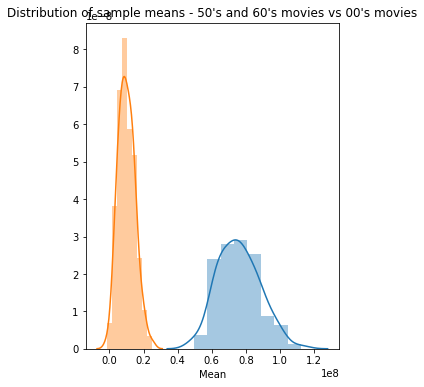

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()



In [11]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [12]:
print("The mean for 50s movies is :",fifth_movies_profit_adjusted.mean())
print("The std for 50s movies is :",fifth_movies_profit_adjusted.std())
print("The var for 50s movies is :",fifth_movies_profit_adjusted.var())

print('=====================')

print("The mean for now movies is :",now_movies_profit_adjusted.mean())
print("The std for now movies is :",now_movies_profit_adjusted.std())
print("The var for now movies is :",now_movies_profit_adjusted.var())



The mean for 50s movies is : 76559381.44716212
The std for 50s movies is : 82982193.1145535
The var for 50s movies is : 6886044374101050.0
The mean for now movies is : 9618632.796179065
The std for now movies is : 27623106.735850368
The var for now movies is : 763036025740181.9


### Welch t-test

In [13]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech T-test is: 11.071194499940479


### Degrees of freedom

In [14]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)))

Wlech degrees of freedom are: 193.3316231895007


In [15]:
t = welch_t(fifth_movies_profit_adjusted, now_movies_profit_adjusted)
df = welch_df(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

### Convert to p-value

In [16]:
import scipy.stats as stats

In [17]:
p = 1 - float(stats.t.cdf(t, df))
print(p)

0.0


### Cohen's d test

In [86]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = np.mean(group1) - np.mean(group2)

    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1)
    var2 = np.var(group2)

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [19]:
Cohen_d(fifth_movies_profit_adjusted, now_movies_profit_adjusted)

1.9225664152448578

# Movies nowadays have higher budget than movies on 50's and 60's

- **H0**= No difference between budgets of movies between 50's/60's and movies nowadays (00's/10's)
- **H1**= There is a difference

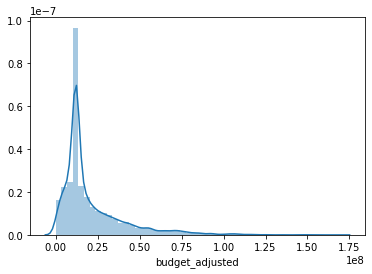

In [20]:
sns.distplot(data_for_ht.budget_adjusted)

In [65]:
fifth_movies_budget_adjusted = list(data_for_ht[(data_for_ht['decade'] == "50s")|(data_for_ht['decade'] == "60s")]['budget_adjusted'])
now_movies_budget_adjusted = list(data_for_ht[(data_for_ht['decade']== "00s")|(data_for_ht['decade'] == "10s")]['budget_adjusted'])

In [66]:
# romance_movies_profit_adjusted

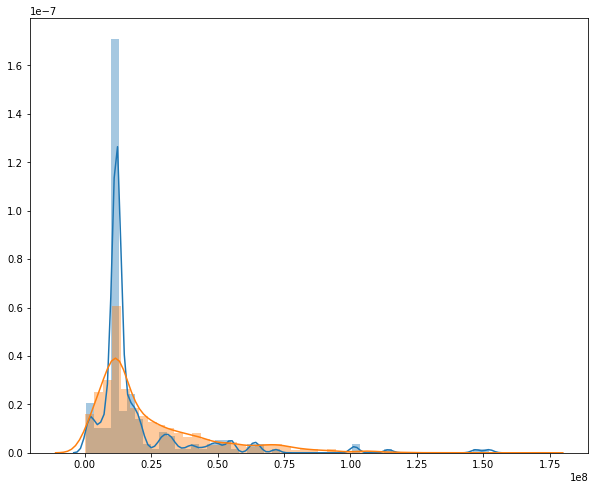

In [67]:
plt.figure(figsize=(10,8))

sns.distplot(fifth_movies_budget_adjusted)
sns.distplot(now_movies_budget_adjusted)


### Sampling samples

In [68]:
import random 

In [69]:
def samples_means(array, samples_wanted):
    sample_means = []
    for i in range(samples_wanted):
        sample_means.append(np.mean(random.sample(list(array), 40)))
    return sample_means

In [70]:
fiv_sample_means = samples_means(fifth_movies_budget_adjusted, 100)
now_sample_means = samples_means(now_movies_budget_adjusted, 100)

print(fiv_sample_means, now_sample_means)

[20760894.17022739, 16444766.647033548, 18500967.06717425, 19390602.09137915, 15485322.595591035, 20929257.91481214, 18565044.778057925, 20298613.21083878, 19019363.152669508, 22214717.40410535, 22075471.255554035, 20599170.625623796, 17135754.325090807, 17657485.948296923, 16074838.972613107, 17930755.16956395, 19602118.669915877, 16871136.985413216, 18088118.741278354, 18018289.844335053, 22483613.64587957, 16183521.801582322, 19041072.82966181, 16399358.477867862, 20253389.642814033, 14943375.181661839, 23052445.406011276, 20859292.599000152, 17541159.33852647, 19014888.49361959, 21794427.006066605, 20926870.99812479, 19965280.586951036, 19406816.827153664, 22159031.9060653, 17444086.096057583, 21264423.946613394, 19955192.183194548, 19427322.070920512, 22482777.75510627, 15874107.979000647, 18114286.12045454, 16368846.541894084, 16551391.201389635, 18725347.82866714, 24833806.480671506, 17887206.123840593, 15786217.511816138, 22604877.36121226, 24028559.80010271, 18041349.186070193

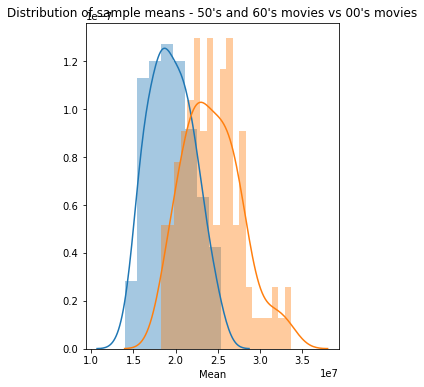

In [71]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(fiv_sample_means, axlabel='Mean')

# plt.subplot(1,2,2)
sns.distplot(now_sample_means, bins = 20)

plt.title("Distribution of sample means - 50's and 60's movies vs 00's movies")
plt.show()




In [72]:
# sns.distplot(now_sample_means)

### Back to the two "populations"

In [75]:
print("The mean for 50s movies is :", np.mean(fifth_movies_budget_adjusted))
print("The std for 50s movies is :",np.std(fifth_movies_budget_adjusted))
print("The var for 50s movies is :",np.var(fifth_movies_budget_adjusted))

print('=====================')

print("The mean for now movies is :",np.mean(now_movies_budget_adjusted))
print("The std for now movies is :",np.std(now_movies_budget_adjusted))
print("The var for now movies is :",np.var(now_movies_budget_adjusted))



The mean for 50s movies is : 19764124.990171283
The std for 50s movies is : 21891245.965123907
The var for 50s movies is : 479226649905553.75
The mean for now movies is : 24423378.743268598
The std for now movies is : 22223271.86481622
The var for now movies is : 493873812377532.06


### Welch t-test

In [80]:
# def welch_t(a, b):
    
#     """ Calculate Welch's t-statistic for two samples. """

#     numerator = np.mean(a) - np.mean(b)
    
#     # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
#     #  where N represents the number of elements. By default ddof is zero.
    
#     denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    
#     return np.abs(numerator/denominator)

# print('Wlech T-test is: {}'.format(welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

In [79]:
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """

    numerator = np.mean(a) - np.mean(b)
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(np.var(a, ddof=1)/len(a) + np.var(b, ddof=1)/len(b))
    np.var(a, ddof=1)
    
    return np.abs(numerator/denominator)

print('Wlech T-test is: {}'.format(welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech T-test is: 2.821414107427349


### Degrees of freedom

In [81]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s1 = np.var(a, ddof=1) 
    s2 = np.var(b, ddof=1)
    n1 = len(a)
    n2 = len(b)
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator

print('Wlech degrees of freedom are: {}'.format(welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)))

Wlech degrees of freedom are: 221.99915543691014


In [82]:
t2 = welch_t(fifth_movies_budget_adjusted, now_movies_budget_adjusted)
df2 = welch_df(fifth_movies_budget_adjusted, now_movies_budget_adjusted)

### Convert to p-value

In [83]:
import scipy.stats as stats

In [84]:
p = 1 - float(stats.t.cdf(t2, df2))
print(p)

0.0026073484046530426


### Cohen's d test

In [88]:
Cohen_d(now_movies_budget_adjusted, fifth_movies_budget_adjusted)

0.2098850151504559

### Evaluating pdf's

In [36]:
import scipy.stats

In [37]:
fiv_for_pdf = scipy.stats.norm(fifth_movies_budget_adjusted.mean(), fifth_movies_budget_adjusted.std())

now_for_pdf = scipy.stats.norm(now_movies_budget_adjusted.mean(), now_movies_budget_adjusted.std())

In [38]:
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys

Text(0.5, 0, 'height (cm)')

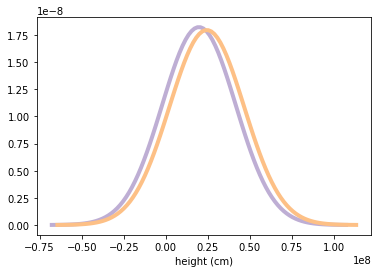

In [39]:
xs, ys = evaluate_PDF(fiv_for_pdf)
plt.plot(xs, ys, label='50s/60s', linewidth=4, color='#beaed4') 


xs, ys = evaluate_PDF(now_for_pdf)
plt.plot(xs, ys, label='Now', linewidth=4, color='#fdc086')

plt.xlabel('height (cm)')

### Overlap threshold

In [40]:
mean1 = np.mean(fiv_sample_means)
mean2 = np.mean(now_sample_means)

In [41]:
sample_of_sm_distr_fifth = random.sample(fiv_sample_means, 50)
sample_of_sm_distr_now = random.sample(now_sample_means, 50)


#### Difference in sample means (Effect Size)

In [42]:
difference_in_means = abs(mean1 - mean2)
difference_in_means
print("Difference between sample means (Effect size) is {}".format(difference_in_means))

Difference between sample means (Effect size) is 4932580.757084481


In [43]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

21995034.015220165

In [44]:
fifth_below_thresh = sum(sample_of_sm_distr_fifth < simple_thresh)
fifth_below_thresh

41

In [45]:
now_below_thresh = sum(sample_of_sm_distr_now < simple_thresh)
now_below_thresh

16

In [46]:
# Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')

NameError: name 'male_height' is not defined

## Power

In [110]:
# Ones sample from samples 
sample_for_power_fifth = random.sample(fifth_movies_budget_adjusted, 100)
sample_for_power_now = random.sample(now_movies_budget_adjusted, 100)


sample_size = len(sample_for_power_fifth)

In [115]:
# This one is with the original samples 

sample_for_power_fifth = fifth_movies_budget_adjusted
sample_for_power_now = now_movies_budget_adjusted


sample_size1 = len(sample_for_power_fifth)
sample_size2 = len(sample_for_power_now)


In [116]:
# mean and std for movies 50s and 60s 
fifth_sample_mean_power = np.mean(sample_for_power_fifth)
fifth_sample_std_power = np.std(sample_for_power_fifth)


# mean and std for movies nowadays 
now_sample_mean_power = np.mean(sample_for_power_now)
now_sample_std_power = np.std(sample_for_power_now)


# number of simulations
number_of_simulation = 1000

In [117]:
np.random.seed(30)

# Initialize array to store results
p = (np.empty(number_of_simulation))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim

for s in range(number_of_simulation):

    fifth = np.random.normal(loc= fifth_sample_mean_power, scale=fifth_sample_std_power, size=sample_size1)
    
    now = np.random.normal(loc= now_sample_mean_power, scale=now_sample_std_power, size=sample_size2)
    
    t_test = stats.ttest_ind(sample_for_power_fifth, sample_for_power_now)
    
    p[s] = t_test[1]

# number of null hypothesis rejections
num_null_rejects = np.sum(p < 0.05)
power = num_null_rejects/float(number_of_simulation)

power

1.0